<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Deciding on Compensation Benefits</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project - Agreement Reached </h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)
    * [1.3 Assumptions](#13-assumptions)

* [2. Predicting Agreement Reached](#2-predicting-agreement-reached)
    * [2.1 Split the data set](#21-split-the-data-set)
    * [2.2 Dealing with class imbalance](#22-dealing-with-class-imbalance)
    * [2.3 Models](#23-models)
        * [2.3.1 Logistic Regression](#231-logistic-regression)
        * [2.3.2 Random Forest](#232-random-forest)
        * [2.3.3 XGBoost](#233-xgboost)
        * [2.3.4 Perceptron](#234-perceptron)
        * [2.3.5 Neural Networks - Multilayer Perceptron](#235-neural-networks---multilayer-perceptron)



<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## **1.1** Import Libraries

In [ ]:
from functions import *

## **1.2** Import Dataset

In [41]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

## **1.3** Assumptions

In [42]:
# scaler = MinMaxScaler()
scaler = PowerTransformer(method='yeo-johnson', standardize=True)

<div class="alert alert-block alert-success">

# **2.** Predicting Agreement Reached

<div>

In [43]:
y_2 = X.set_index('Claim Identifier')['Agreement Reached']  # Target variable with claim identifier as index
X_2 = X.set_index('Claim Identifier').drop(columns=['Agreement Reached'])  # Features with claim identifier as index

In [44]:
y_2.value_counts()

Agreement Reached
0.0    544885
1.0     26641
Name: count, dtype: int64

## 2.1 Split the data set

In [ ]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size = 0.3, 
                                                  random_state = 0, # Ensures reproducibility by controlling the random shuffling of data.
                                                                    # Using the same random_state will always yield the same split.

                                                  stratify = y_2,     # Ensures that the class distribution (for classification problems) is preserved
                                                                    # in both the training and validation sets, maintaining the proportion of each class.

                                                  shuffle = True)   # Shuffles the data before splitting to ensure a random distribution 
                                                                    # between the training and validation sets.
                                                                    
X_train_2, X_val_2, y_train_2 = preprocessing(X_train_2, X_val_2, y_train_2, scaler=scaler)

/Users/margaridabravocardoso/Desktop/final/15_12/functions_final.py:1007: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df[col] = new_df[col].replace(['Y', 'N'], [1, 0]).astype(int)
/Users/margaridabravocardoso/Desktop/final/15_12/functions_final.py:1007: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df[col] = new_df[col].replace(['Y', 'N'], [1, 0]).astype(int)
/Users/margaridabravocardoso/Desktop/final/15_12/functions_final.py:1001: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

In [46]:
X_train_2 = feature_selection(X_train_2, y_train_2)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


All feature selection methods applied.
Numerical majority features: ['Days until Assembly', 'ce_Carrier Type', 'Birth Year', 'Average Weekly Wage', 'Days until First Report', 'IME-4 Count', 'Assembly Date Referenced', 'Age at Injury', 'Log Average Weekly Wage', 'ce_Carrier Name', 'First Report Referenced', 'ce_Industry Code Description', 'Accident Date Referenced']
Features to drop: {'Log Average Weekly Wage', 'First Report Referenced', 'Age at Injury', 'Days until First Report', 'Accident Date Referenced'}


In [47]:
X_val_2 = X_val_2[X_train_2.columns]

In [48]:
X_train_2

,Average Weekly Wage Missing,Alternative Dispute Resolution,Days until Assembly,WCIO Part Of Body Description Missing,ce_Carrier Type,C-3 Date Missing,Birth Year,Average Weekly Wage Zero,Average Weekly Wage,Attorney/Representative,...,Industry Code Description Missing,IME-4 Count,Carrier Type Missing,Assembly Date Referenced,C-2 Date Missing,Gender,ce_Carrier Name,ce_Industry Code Description,First Hearing Date Missing,First Report Submitter
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5580815,1,0,0.443313,0,-0.875504,0,1.268236,1,-0.618916,1,...,0,-0.550697,0,-0.809618,0,0,1.514436,0.133551,1,1
5871018,0,0,-1.458837,0,0.964638,0,-1.290446,0,-0.144806,1,...,0,1.842168,0,0.483340,0,0,0.438724,0.133551,1,0
5756578,0,0,0.056028,0,0.964638,1,-0.876717,1,0.598186,1,...,0,1.937597,0,0.010638,0,1,-0.290783,-1.686340,0,0
5899402,1,0,0.191446,1,0.964638,1,0.128026,1,0.401481,0,...,0,-0.550697,0,0.603263,0,1,-0.416927,-1.114123,1,0
5734547,0,0,2.169746,0,-0.875504,0,0.500613,1,0.324471,1,...,0,1.937597,0,-0.075086,0,0,1.514436,-0.750550,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928065,0,0,1.644273,0,-0.753289,0,-0.666103,1,1.143644,1,...,0,-0.550697,0,0.707666,0,0,0.638439,0.837700,0,1
5863005,0,0,-0.465362,0,0.964638,1,0.651724,1,0.935077,1,...,0,-0.550697,0,0.443016,0,0,0.080160,-0.521385,1,0
5978453,0,0,2.213613,0,-0.753289,1,-1.084822,0,1.005495,0,...,0,-0.550697,0,0.885709,0,1,0.011996,1.326134,1,1


In [49]:
X_combined_2 = pd.concat([X_train_2, X_val_2])
y_combined_2 = pd.concat([y_train_2, y_val_2])

# Create a test fold index (-1 for train_2, 0 for validation)
test_fold = [-1] * len(X_train_2) + [0] * len(X_val_2)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined_2))
print('y_combined: ', len(y_combined_2))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  565331
X_combined:  565331
y_combined:  565331


## 2.2 Dealing with class imbalance

In [50]:
tomek = TomekLinks(sampling_strategy='not majority')

# Apply Tomek Links to the dataset
X_resampled_2, y_resampled_2 = tomek.fit_resample(X_train_2, y_train_2)

# Check class distribution
print("Original class distribution:")
print(y_2.value_counts())
print("\nClass distribution after Tomek Links:")
print(pd.Series(y_resampled_2).value_counts())

Original class distribution:
Agreement Reached
0.0    544885
1.0     26641
Name: count, dtype: int64

Class distribution after Tomek Links:
Agreement Reached
0.0    375259
1.0     12439
Name: count, dtype: int64


In [55]:
X_combined_resampled_2 = pd.concat([X_resampled_2, X_val_2], axis=0)
y_combined_resampled_2 = pd.concat([y_resampled_2, y_val_2], axis=0)

# Create a test fold index (-1 for train_2, 0 for validation)
test_fold = [-1] * len(X_resampled_2) + [0] * len(X_val_2)

print('Test fold: ', len(test_fold))
print('X_combined_resampled: ', len(X_combined_resampled_2))
print('y_combined: ', len(y_combined_resampled_2))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  559156
X_combined_resampled:  559156
y_combined:  559156


## 2.3 Models

### 2.3.1 Logistic Regression

In [74]:
lr_1 = LogisticRegression(random_state=42)

param_distributions_lr_1 = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}


random_search_lr1 = RandomizedSearchCV(
    lr_1, 
    param_distributions_lr_1, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_lr1.fit(X_combined_2, y_combined_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_lr1.best_params_)
print("Best Validation (Test) Score:", random_search_lr1.best_score_)
results_df_1 = pd.DataFrame(random_search_lr1.cv_results_)
train_score_best_model_lr1 = results_df_1.loc[results_df_1['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_lr1)

Fitting 1 folds for each of 50 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver 

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
Best Validation (Test) Score: 0.4924599260431209
Training F1 Score from CV Results: 0.5141338748246115


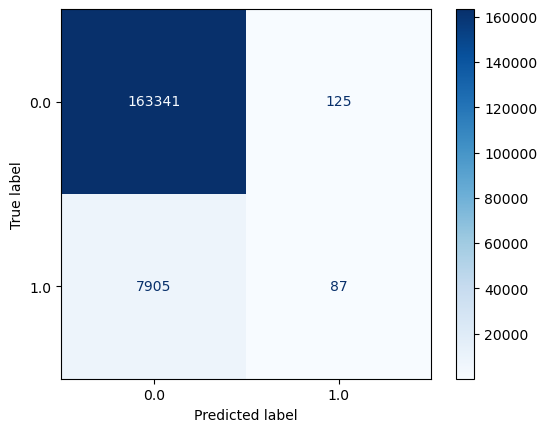

In [75]:
best_lr1_model = random_search_lr1.best_estimator_

y_pred1 = best_lr1_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true1 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true1, y_pred1)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr1_model.classes_)
disp.plot(cmap="Blues", values_format='d')

In [76]:
lr2 = LogisticRegression(random_state=42)

param_distributions_lr2 = {
    'penalty': ['l1', 'l2'],  # Drop 'elasticnet' if not necessary
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # Focus on 'liblinear' for binary classification
    'max_iter': [100, 200, 500]
}


random_search_lr2 = RandomizedSearchCV(
    lr2, 
    param_distributions_lr2, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_lr2.fit(X_combined_resampled_2, y_combined_resampled_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_lr2.best_params_)
print("Best Validation (Test) Score:", random_search_lr2.best_score_)

results_df_2 = pd.DataFrame(random_search_lr2.cv_results_)
train_score_best_model_lr2 = results_df_2.loc[results_df_2['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_lr2)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 1 folds for each of 30 candidates, totalling 30 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 1}
Best Validation (Test) Score: 0.4894407492336572
Training F1 Score from CV Results: 0.5052111238316656


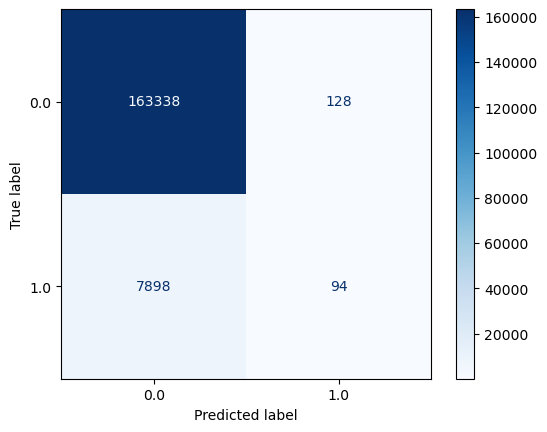

In [77]:
best_lr2_model = random_search_lr2.best_estimator_

y_pred2 = best_lr2_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true2 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true2, y_pred2)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr2_model.classes_)
disp.plot(cmap="Blues", values_format='d')

**CONCLUSIONS**: The validation score slightly decreased after undersampling, what suggests that the removal of borderline samples did not improve generalization performance on the test data. Despite this, the detection of the minority class (1) improved slightly from 87 to 94, but 
the improvement is minimal.

### 2.3.2 Random Forest

In [78]:
rf1 = RandomForestClassifier(random_state=42,class_weight='balanced')

param_distributions_rf1 = {
    'n_estimators': [5,10,15, 20],
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf1 = RandomizedSearchCV(
    rf1, 
    param_distributions_rf1, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_rf1.fit(X_combined_2, y_combined_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_rf1.best_params_)
print("Best Validation (Test) Score:", random_search_rf1.best_score_)


results_df_3 = pd.DataFrame(random_search_rf1.cv_results_)
train_score_best_model_rf3 = results_df_3.loc[results_df_3['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_rf3)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'bootstrap': True}
Best Validation (Test) Score: 0.5729982219009261
Training F1 Score from CV Results: 0.5674781853681247


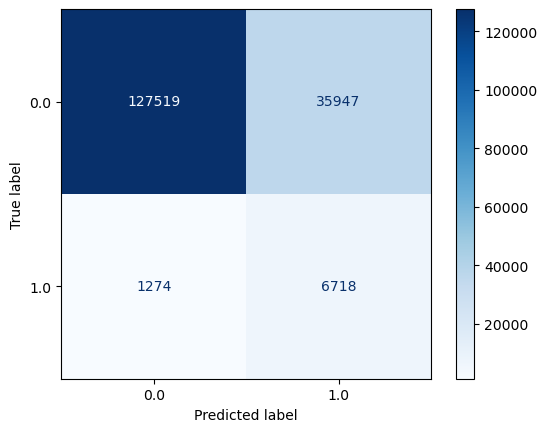

In [79]:
best_rf1_model = random_search_rf1.best_estimator_

y_pred3 = best_rf1_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true3 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true3, y_pred3)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf1_model.classes_)
disp.plot(cmap="Blues", values_format='d')

In [71]:
rf2 = RandomForestClassifier(random_state=42, class_weight='balanced')

param_distributions_rf2 = {
    'n_estimators': [5,10,15, 20],
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_search_rf2 = RandomizedSearchCV(
    rf2, 
    param_distributions_rf2, 
    n_iter=50, 
    scoring='f1_macro',
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_rf2.fit(X_combined_resampled_2, y_combined_resampled_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_rf2.best_params_)
print("Best Validation (Test) Score:", random_search_rf2.best_score_)


results_df_4 = pd.DataFrame(random_search_rf1.cv_results_)
train_score_best_model_rf4 = results_df_4.loc[results_df_4['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_rf4)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'bootstrap': True}
Best Validation (Test) Score: 0.5751341065183304
Training F1 Score from CV Results: 0.5674781853681247


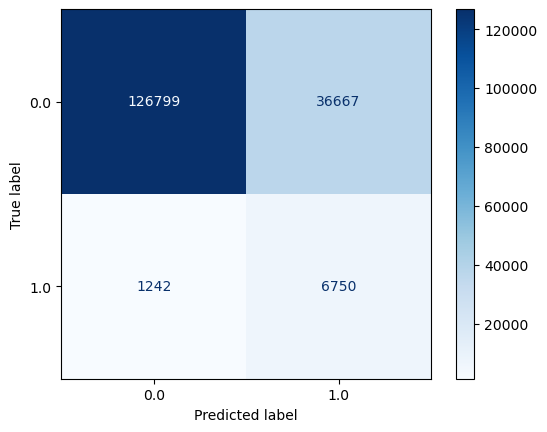

In [80]:
best_rf2_model = random_search_rf2.best_estimator_

y_pred4 = best_rf2_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true4 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true4, y_pred4)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf2_model.classes_)
disp.plot(cmap="Blues", values_format='d')

**CONCLUSION**: Random Forest with undersampling showed a small but consistent improvement in detecting the minority class and slightly improved generalization (Validation Score: 0.5751).
Unlike Logistic Regression, the Random Forest model benefited more from undersampling, likely due to its ability to handle resampled data more effectively.

### 2.3.3 XGBoost

In [66]:
xgb1 = XGBClassifier(random_state=42, eval_metric='logloss')

param_distributions_xgb1 = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 1.5]
}

random_search_xgb1 = RandomizedSearchCV(
    xgb1, 
    param_distributions_xgb1, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_xgb1.fit(X_combined_2, y_combined_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_xgb1.best_params_)
print("Best Validation (Test) Score:", random_search_xgb1.best_score_)

results_df_5 = pd.DataFrame(random_search_xgb1.cv_results_)
train_score_best_model_xgb1 = results_df_5.loc[results_df_5['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_xgb1)



Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 20, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Validation (Test) Score: 0.5234204073772063
Training F1 Score from CV Results: 0.5465196817977738


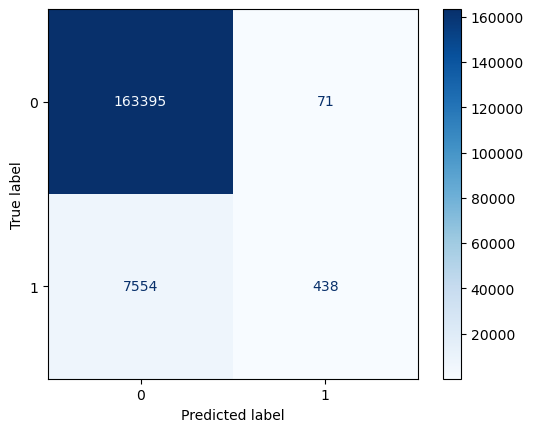

In [81]:
best_xgb1_model = random_search_xgb1.best_estimator_

y_pred5 = best_xgb1_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true5 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true5, y_pred5)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb1_model.classes_)
disp.plot(cmap="Blues", values_format='d')

In [67]:
xgb2 = XGBClassifier(random_state=42, eval_metric='logloss')

param_distributions_xgb2 = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1,2,3,4,5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 1.5]
}

random_search_xgb2 = RandomizedSearchCV(
    xgb2, 
    param_distributions_xgb2, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_xgb2.fit(X_combined_resampled_2, y_combined_resampled_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_xgb2.best_params_)
print("Best Validation (Test) Score:", random_search_xgb2.best_score_)

results_df_6 = pd.DataFrame(random_search_xgb2.cv_results_)
train_score_best_model_xgb2 = results_df_6.loc[results_df_6['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_xgb2)


Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 20, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Validation (Test) Score: 0.5364718142556847
Training F1 Score from CV Results: 0.5761527995208066


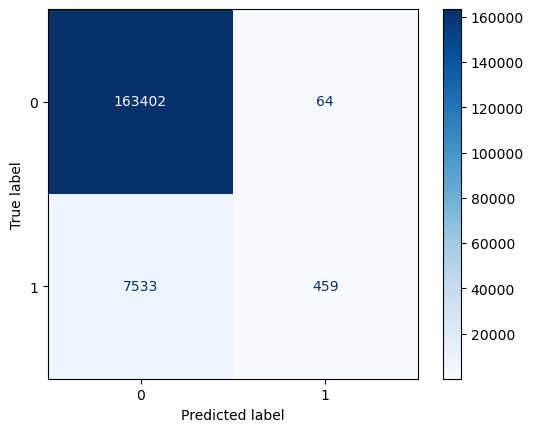

In [82]:
best_xgb2_model = random_search_xgb2.best_estimator_

y_pred5 = best_xgb2_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true5 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true5, y_pred5)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb2_model.classes_)
disp.plot(cmap="Blues", values_format='d')

**CONCLUSIONS**: XGBoost with undersampling performed better on both training and validation datasets compared to without undersampling.
The combination of XGBoost and undersampling appears to be more effective in handling class imbalance.

### 2.3.4 Perceptron

In [84]:
perceptron1 = Perceptron(random_state=42)

param_distributions_perceptron1= {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.001, 0.01, 0.1, 1],
    'fit_intercept': [True, False]
}

random_search_p1 = RandomizedSearchCV(
    perceptron1, 
    param_distributions_perceptron1, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_p1.fit(X_combined_2, y_combined_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_p1.best_params_)
print("Best Validation (Test) Score:", random_search_p1.best_score_)

results_df_7 = pd.DataFrame(random_search_p1.cv_results_)
train_score_best_model_p1 = results_df_7.loc[results_df_7['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_p1)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'penalty': 'l1', 'max_iter': 2000, 'fit_intercept': True, 'eta0': 1, 'alpha': 0.0001}
Best Validation (Test) Score: 0.5987628712038977
Training F1 Score from CV Results: 0.5958808100829355


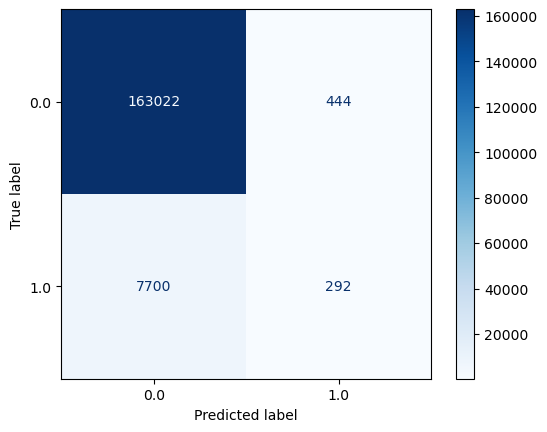

In [85]:
best_p1_model = random_search_p1.best_estimator_

y_pred6 = best_p1_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true6 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true6, y_pred6)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_p1_model.classes_)
disp.plot(cmap="Blues", values_format='d')

In [86]:
perceptron2 = Perceptron(random_state=42)

param_distributions_perceptron2 = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.001, 0.01, 0.1, 1],
    'fit_intercept': [True, False]
}

random_search_p2 = RandomizedSearchCV(
    perceptron2, 
    param_distributions_perceptron2, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_p2.fit(X_combined_resampled_2, y_combined_resampled_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_p2.best_params_)
print("Best Validation (Test) Score:", random_search_p2.best_score_)

results_df_8 = pd.DataFrame(random_search_p2.cv_results_)
train_score_best_model_p2 = results_df_8.loc[results_df_8['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_p2)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'penalty': 'l2', 'max_iter': 2000, 'fit_intercept': False, 'eta0': 0.01, 'alpha': 0.001}
Best Validation (Test) Score: 0.5984859013288721
Training F1 Score from CV Results: 0.5647957792121421


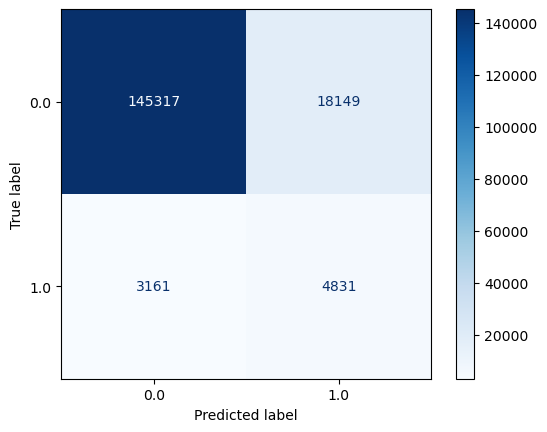

In [87]:
best_p2_model = random_search_p2.best_estimator_

y_pred7 = best_p2_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true7 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true7, y_pred7)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_p2_model.classes_)
disp.plot(cmap="Blues", values_format='d')

**CONCLUSIONS**: Perceptron without undersampling fits the training data better and achieves a slightly higher validation score.
Despite this, with undersampling, the model improved its ability to detect the minority class but at the cost of precision (increased False Positives).

### 2.3.5 Neural Networks - Multilayer Perceptron

In [89]:
mlp1 = MLPClassifier(random_state=42)

# Hyperparameter grid
param_distributions_mlp1 = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 400, 800]
}

random_search_mlp1 = RandomizedSearchCV(
    mlp1, 
    param_distributions_mlp1, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_mlp1.fit(X_combined_2, y_combined_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_mlp1.best_params_)
print("Best Validation (Test) Score:", random_search_mlp1.best_score_)

results_df_9 = pd.DataFrame(random_search_mlp1.cv_results_)
train_score_best_model_mlp1 = results_df_9.loc[results_df_9['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_mlp1)


Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'logistic'}
Best Validation (Test) Score: 0.59021484326279
Training F1 Score from CV Results: 0.5803978466279804


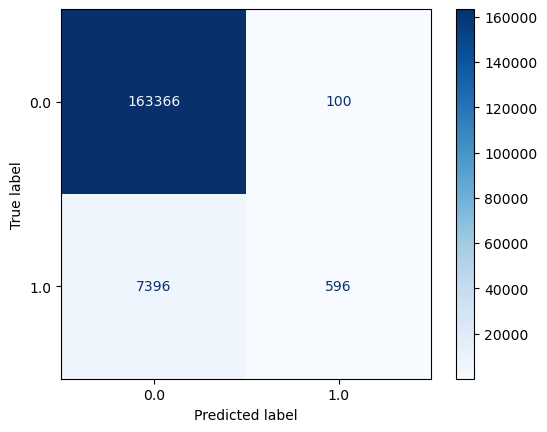

In [90]:
best_mlp1_model = random_search_mlp1.best_estimator_

y_pred8 = best_mlp1_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true8 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true8, y_pred8)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp1_model.classes_)
disp.plot(cmap="Blues", values_format='d')

In [64]:
mlp2 = MLPClassifier(random_state=42)

# Hyperparameter grid
param_distributions_mlp2 = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 400, 800]
}

random_search_mlp2 = RandomizedSearchCV(
    mlp2, 
    param_distributions_mlp2, 
    n_iter=50, 
    scoring='f1_macro', 
    cv=ps, 
    random_state=42, 
    verbose = 1,
    n_jobs=-1,
    return_train_score=True
)

# Step 4: Fit the random search
random_search_mlp2 .fit(X_combined_resampled_2, y_combined_resampled_2)

# Step 6: Print the best parameters and scores
print("Best Parameters:", random_search_mlp2 .best_params_)
print("Best Validation (Test) Score:", random_search_mlp2 .best_score_)

results_df_10 = pd.DataFrame(random_search_mlp2.cv_results_)
train_score_best_model_mlp2 = results_df_10.loc[results_df_10['rank_test_score'] == 1, 'mean_train_score'].values[0]

print("Training F1 Score from CV Results:", train_score_best_model_mlp2)


Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Parameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
Best Validation (Test) Score: 0.5692850489027248
Training F1 Score from CV Results: 0.5977764181436785


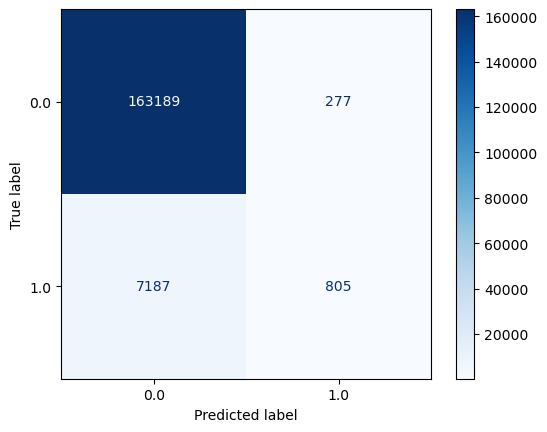

In [91]:
best_mlp2_model = random_search_mlp2.best_estimator_

y_pred9 = best_mlp2_model.predict(X_val_2)  # Replace with your validation/test dataset
y_true9 = y_val_2  # Replace with your true labels for validation/test

cm = confusion_matrix(y_true9, y_pred9)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp2_model.classes_)
disp.plot(cmap="Blues", values_format='d')

**CONCLUSIONS**: Without undersampling, the model generalizes better, achieving a higher validation score (0.5902) despite lower True Positive detection.
With undersampling, the model improves its recall on the minority class but overfits the training data, as indicated by the drop in Validation Score.

IMPACT OF UNDER-SAMPLING:
- Logistic Regression: Marginal improvement in minority detection (TP: 87 → 94).
- Random Forest: Improved slightly in minority class detection (TP: 6718 → 6750).
- XGBoost: Improvement in both recall and overall F1 Score (TP: 438 → 459).
- Perceptron: Drastic increase in recall but at the cost of many False Positives.
- MLP: Better recall on minority class but worsened generalization. <br> <br>

VALIDATION-SCORE:
- Improved slightly for models that can handle class imbalance wel (Random Forest and XGBoost).
- Decreased for models like MLP and Perceptron, what suggests overfitting after removing borderline samples.